<a href="https://colab.research.google.com/github/tb-harris/neuroscience-2025/blob/main/1_Visualizing_and_Describing_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing and Describing Distributions

## Library imports

Importing Python libraries that will allow us to have DataFrames, visualizations:

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [41]:
penguins = pd.read_csv("https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv")

## Overview of data

In [42]:
penguins.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Checking how many non-NaN values are each column:

In [43]:
penguins.count()

,0
rowid,344
species,344
island,344
bill_length_mm,342
bill_depth_mm,342
flipper_length_mm,342
body_mass_g,342
sex,333
year,344


We can see that our data has some NaN values -- that probably indicates data points that the researchers weren't able to gather or record for whatever reason.

`shape` tells us the number of rows and columns in our data frame:

In [44]:
penguins.shape

(344, 9)

Our dataset has 344 observations and 9 columns.

## Understanding our dataset's distribution

We will learn three methods to help analyze distributions:

* summary statistics
* histograms
* box plots

Although the rest of the notebook is broken into sections introducing each method, we might typically use them all together to get multiple perspectives on the same distribution.

We will use these tools to help describe variables':
* **S**hape
* **C**enter
* **O**utliers
* **V**ariability

## Summary statistics

We can calculate summary statistics on our meaningful numeric variables, like `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g`:

In [45]:
penguins['bill_depth_mm'].describe()

,bill_depth_mm
count,342.000000
mean,17.151170
std,1.974793
min,13.100000
25%,15.600000
50%,17.300000
75%,18.700000
max,21.500000


* count - number of observations
* std - sample standard deviation
* 25%, 75% - 1st and 3rd quartiles
* 50% - median

The typical variation from the mean bill depth of 17.15 mm is around 1.97 mm. 25% of penguins have a bill depth less than 15.6 mm.

In [46]:
penguins["body_mass_g"].describe()

,body_mass_g
count,342.000000
mean,4201.754386
std,801.954536
min,2700.000000
25%,3550.000000
50%,4050.000000
75%,4750.000000
max,6300.000000


* The typical variation from the mean bill length of 4202g is around 802g.
* The mean is bigger than the median -> maybe slight right skew

We can also calculate these stats individually. For example:

In [47]:
penguins["body_mass_g"].quantile(0.25)

np.float64(3550.0)

Getting IQR:

In [48]:
penguins["body_mass_g"].quantile(0.75) - penguins["body_mass_g"].quantile(0.25)

np.float64(1200.0)

To better analyze a boxplot/histogram that's divided up by category, we can also get per-category summary statistics:

In [ ]:
penguins['bill_depth_mm'].groupby(penguins['species']).describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,151.0,18.346358,1.216650,15.5,17.5,18.40,19.0,21.5
Chinstrap,68.0,18.420588,1.135395,16.4,17.5,18.45,19.4,20.8
Gentoo,123.0,14.982114,0.981220,13.1,14.2,15.00,15.7,17.3


## Histograms

There are lots of ways we can make the same graph in python:
```
sns.histplot(x=penguins["bill_depth_mm"])
plt.hist(x=penguins["bill_depth_mm"])
penguins["bill_depth_mm"].hist()
sns.histplot(data=penguins, x="bill_depth_mm")
sns.displot(x=penguins["bill_depth_mm"])

```

This all creates the same figure, and it all (eventually) uses matplotlib!

We will mostly use **seaborn** (which we've imported as `sns`), which provides convinience functions for creating matplotlib visualizations more easily. The documentation and its examples are very helpful for understanding what each plotting function can do:
* [histplot() documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html)
* [Visualizing distributions tutorial](https://seaborn.pydata.org/tutorial/distributions.html)

The documentation has lots of information on different parameters that we can use with plotting functions. Some for histogram include:
* binwidth - Width of each bin
* binrange - Start and end of the bins (look at .describe()!)
* bins - Number of bins

Let's create a histogram of penguin bill depth. By default, the plotting libraries "guess" the best configuration of bins based on our data, which might not always be ideal. By default, seaborn creates a histogram for `bill_depth_mm` that has bins of width ~0.8 mm, and which don't align with the ticks on our graph. We can instead use `binwidth` to make each bin exactly 1 and `binrange=(min, max)` to ensure that the bins start from a whole number (using `describe()` to find an appropriate min and max that includes all of our data).

Text(0.5, 0, 'Bill Depth (mm)')

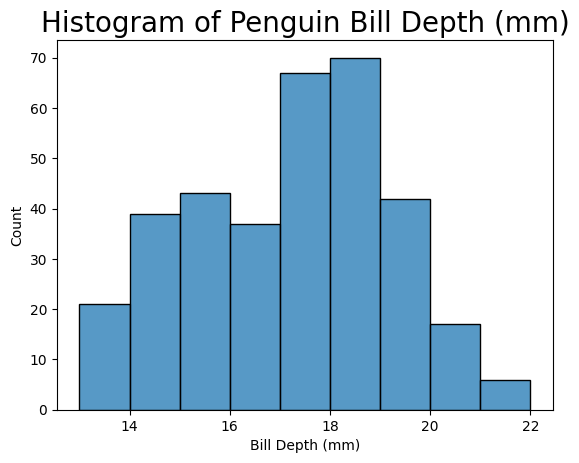

In [49]:
sns.histplot(x=penguins["bill_depth_mm"], binwidth=1, binrange=(13, 22))

# We can customize appearence with things like plt.title(), plt.xlabel()
plt.title("Histogram of Penguin Bill Depth (mm)", fontsize=20)
plt.xlabel("Bill Depth (mm)")

* S: The distribution of bill depth is roughly symmetric and unimodal
* C: The mean bill depth is 17.15 mm
* V: The standard deviation of bill depth is 1.97 mm
* O: No potential outliers

### Separating by categorical variable

We can also use histograms to examine differences in distributions based on a categorical variable.

### Hue

The `hue` parameters colors the graph by categorical variable: here, we generate a histogram that shows the distribution for each sex.

Note that this format can be a bit confusing to read- might not be the best for presentations.

<Axes: xlabel='bill_depth_mm', ylabel='Count'>

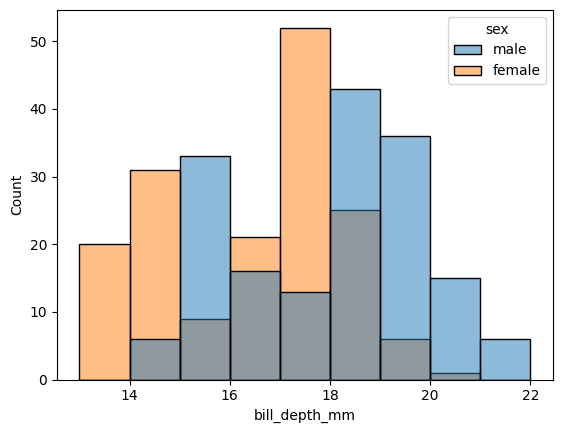

In [50]:
sns.histplot(x=penguins['bill_depth_mm'], hue=penguins['sex'], binwidth=1, binrange=(13, 22))

### Side-by-side distributions by categorical variable

Hue can be confusing to visualize. We can show the same information side-by-side with [sns.displot()](https://seaborn.pydata.org/generated/seaborn.distplot.html) (**not** dis**t**plot, which is a different command!), using the `col` parameter to specify the column with your categorical variable.

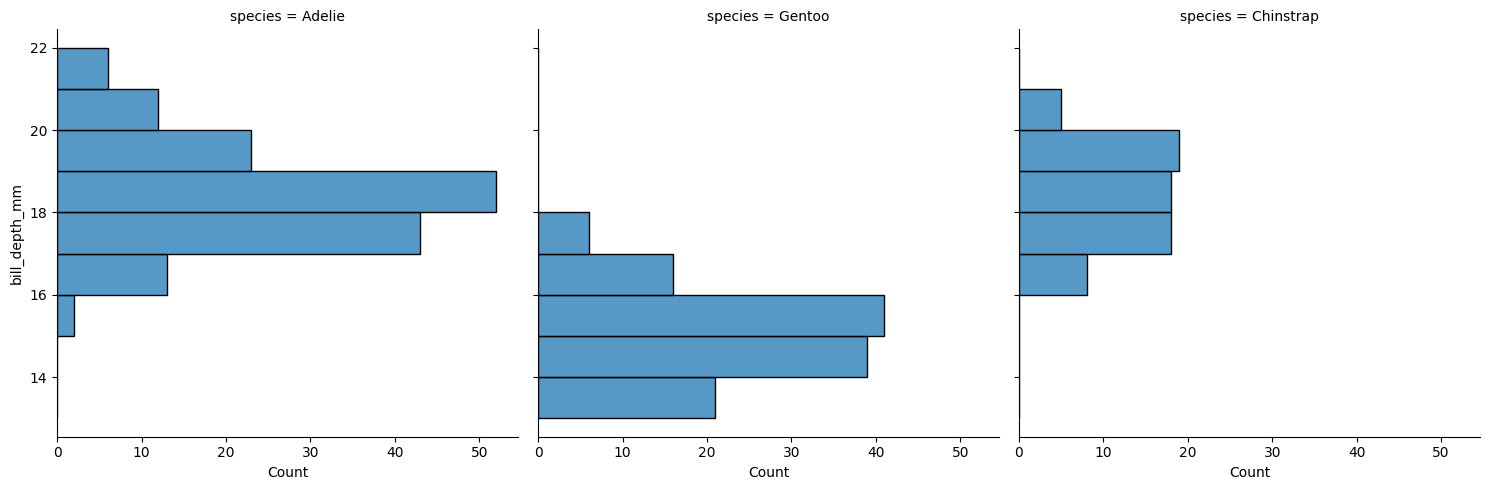

In [76]:
sns.displot(y=penguins['bill_depth_mm'], col=penguins['species'], binwidth=1, binrange=(13, 22))

Surprisingly, this seems to suggest that penguins' beak depths have a bimodal distribution.

We can get a clearer picture, however, when we combine

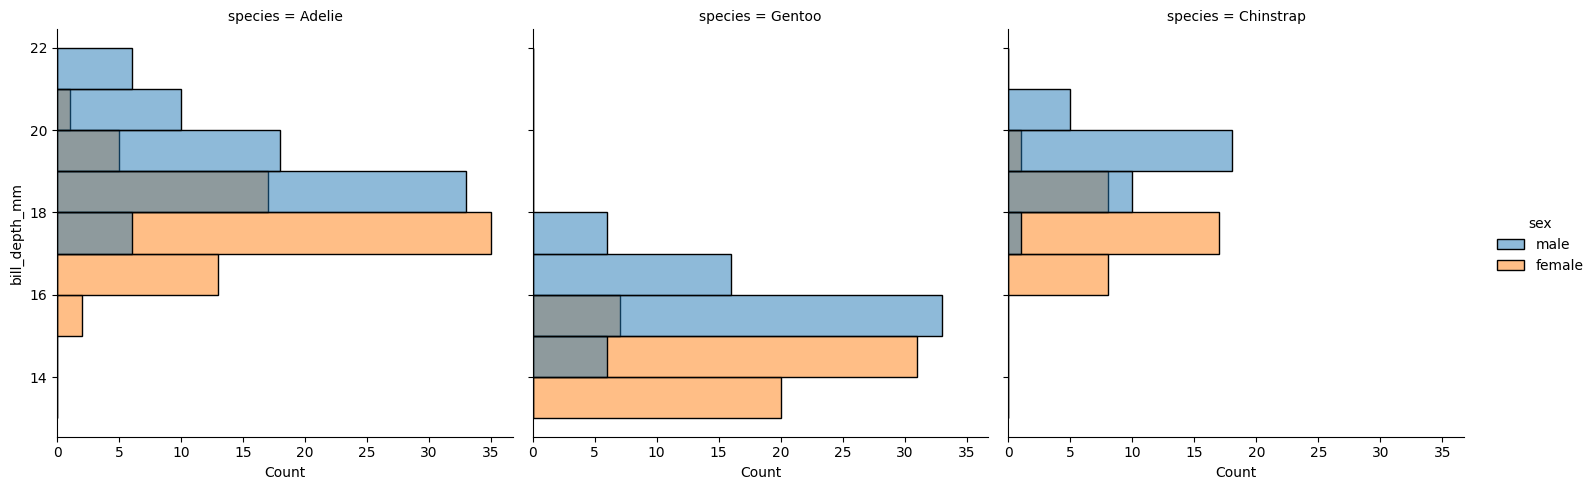

In [52]:
sns.displot(y=penguins['bill_depth_mm'], col=penguins['species'], hue=penguins['sex'], binwidth=1, binrange=(13, 22))

## Box Plots

We can use box plots to get a higher-level view of distributions.

Box plots can be created seaborn with the [sns.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html) method.

Using `x=` vs `y=` controls whether our boxplot is horizontal or vertical. Saving the plot into a variable can help get rid of extra output text

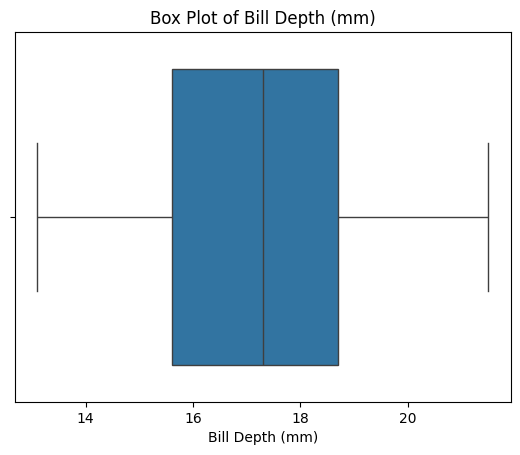

In [69]:
_ = sns.boxplot(x=penguins['bill_depth_mm'])
# plt.xticks(range(13, 23))
_ = plt.title("Box Plot of Bill Depth (mm)")
_ = plt.xlabel("Bill Depth (mm)")

We can use `x` and `y` together to create multiple box plots on the same axes. Flipping `x` and `y` will change whether the box plot is horizontal or vertical. This boxplot shows the same distribution as a previous histogram:

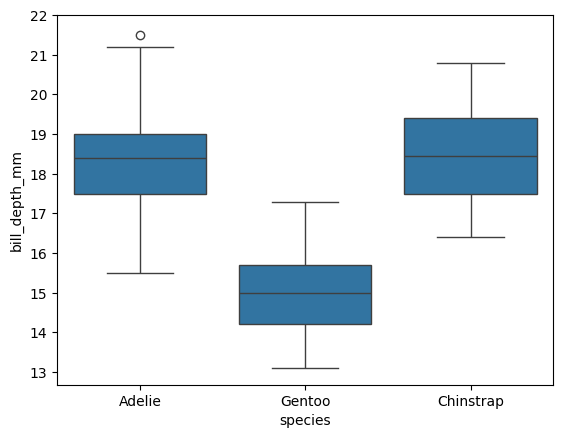

In [73]:
_ =sns.boxplot(y=penguins['bill_depth_mm'], x=penguins["species"])
_ = plt.yticks(range(13, 23))

To better analyze a boxplot/histogram that's divided up by category, we can also get per-category summary statistics:


In [75]:
penguins['bill_depth_mm'].groupby(penguins['species']).describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,151.0,18.346358,1.216650,15.5,17.5,18.40,19.0,21.5
Chinstrap,68.0,18.420588,1.135395,16.4,17.5,18.45,19.4,20.8
Gentoo,123.0,14.982114,0.981220,13.1,14.2,15.00,15.7,17.3


* Gentoo has much lower median bill depth than the other two species
* Adeliede only one with outlier, highest total variability
* Chintraps higher IQR / higher middle 50%

Just like before, we can further divide categorical groupings by hue:

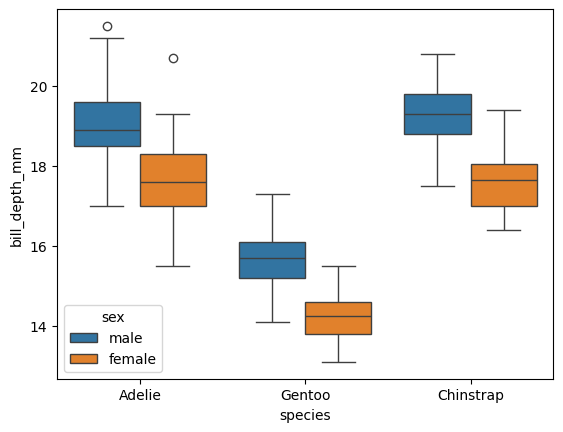

In [77]:
_ =sns.boxplot(y=penguins['bill_depth_mm'], x=penguins["species"], hue=penguins["sex"])

# Practice Activity

Choose another numerical feature.
* Analyze its overall distribution (summary statistics, histogram, and box plot -- write conclusions based on all 3: SCOV, including units)
* Once you've done that, ask a question about the data (ex: Does mass vary according to sex?) and answer it by looking at categorically separated distributions